In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

def get_exp_ids(corpus='amazon_grouped-tagged'):
    # curve when varying k
    query_dict = {'expansions__decode_handler': 'SignifierSignifiedFeatureHandler'}
    return Experiment.objects.filter(**query_dict).values_list('id', flat=True)

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


ids are [43, 44, 45, 46]
Calculating CI for exp 43
Calculating CI for exp 44
Calculating CI for exp 45
Calculating CI for exp 46
folds has 2000 values
Algorithm has 2000 values
Accuracy has 2000 values
Composer has 2000 values


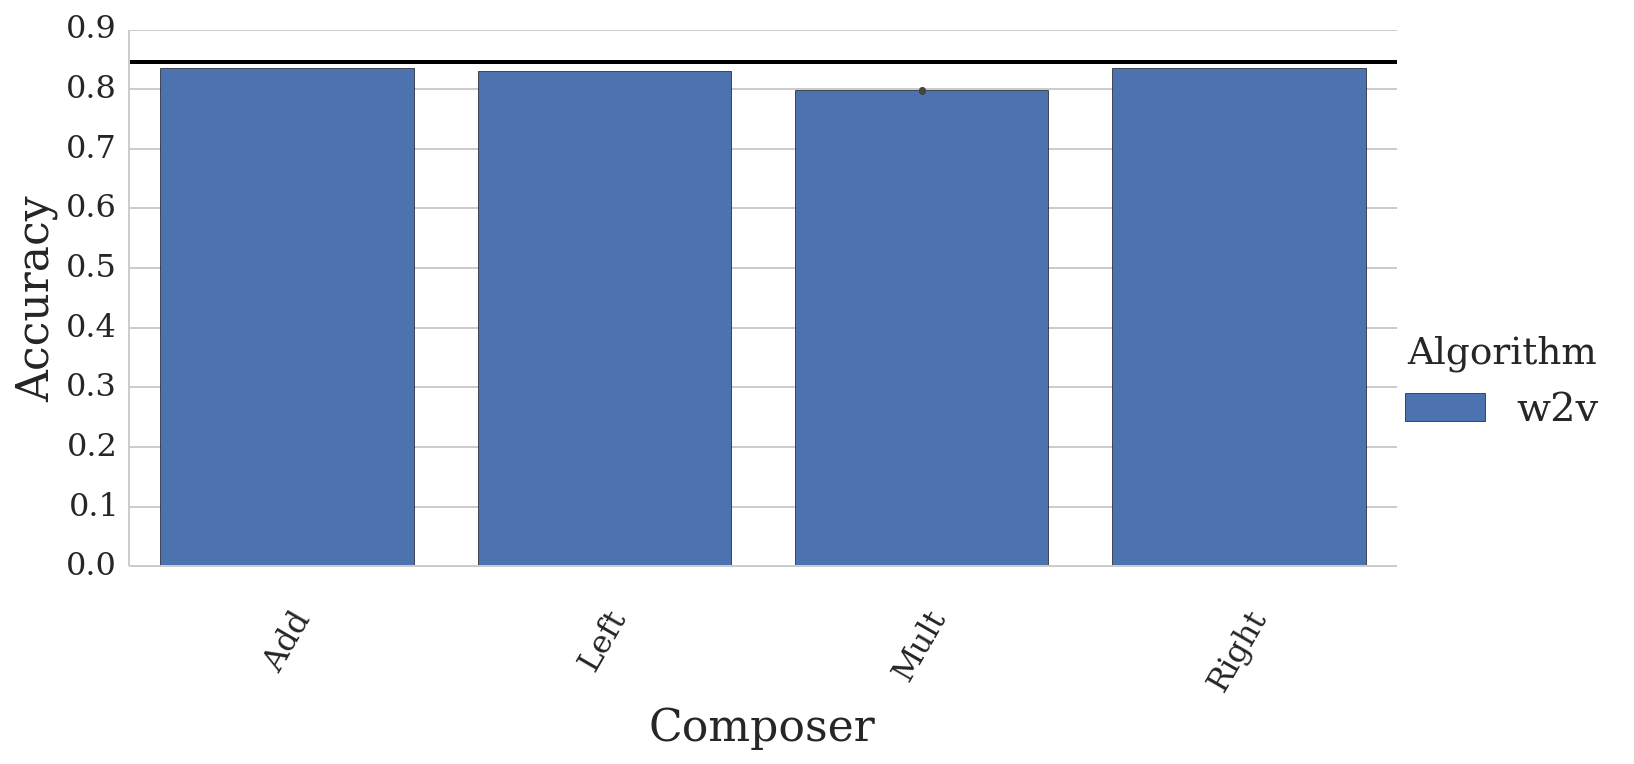

In [2]:
ids = get_exp_ids()
print('ids are', ids)
df = dataframe_from_exp_ids(ids, {'Algorithm':'expansions__vectors__algorithm', 
                                  'Composer':'expansions__vectors__composer'})
grid = sns.factorplot(hue='Algorithm', y='Accuracy', data=df, x='Composer',
                      kind='bar', aspect=2);
grid.set_xticklabels(rotation=60);
plt.axhline(nondistributional_baseline(), c='k')
plt.savefig('plot-w2v-turian-hybrid.pdf', format='pdf', dpi=300)

In [5]:
df.groupby('Composer').Accuracy.mean()

Composer
Add      0.823107
Left     0.816413
Mult     0.782940
Right    0.825268
Name: Accuracy, dtype: float64